In [1]:
import pandas as pd
import os

# Cargar 2023, desagregando archivos xlsx por tab

In [2]:
!dir

 El volumen de la unidad C es Windows-SSD
 El n£mero de serie del volumen es: C6BB-7FEF

 Directorio de C:\Users\simon\Documents\Tesina\testLlama\Repository

12-08-2024  20:40    <DIR>          .
23-07-2024  21:42    <DIR>          ..
12-08-2024  15:07    <DIR>          .ipynb_checkpoints
12-08-2024  14:57             1.116 borrador.py
23-07-2024  21:41                53 config.json
12-08-2024  20:39    <DIR>          csv2023
05-08-2024  18:38    <DIR>          Dump
05-08-2024  18:14             1.480 main.py
12-08-2024  15:36             5.819 notas.md
11-08-2024  12:22            15.782 output.csv
12-08-2024  20:39            13.818 preproc.ipynb
11-08-2024  19:25             2.808 preprocessing.py
05-08-2024  18:13             2.739 rag_utils.py
24-07-2024  19:58           402.378 RAIDD_testData.csv
04-08-2024  22:50             2.933 README.md
21-07-2024  22:36                78 requirements.txt
05-08-2024  19:09               972 test_3.py
08-08-2024  18:32             2.935 test_

In [9]:
"""
Lógica
import pandas as pd
import os
# Archivos
xlsx_files = ['csv2023/2304 - Tech Planning.xlsx', 'csv2023/2305 - Tech Planning.xlsx', 'csv2023/2306 - Tech Planning.xlsx', 'csv2023/2307 - Tech Planning.xlsx', 'csv2023/2308 - Tech Planning.xlsx', 'csv2023/2309 - Tech Planning.xlsx', 'csv2023/2310 - Tech Planning.xlsx', '2023/2311 - Tech Planning.xlsx', 'csv2023/2312 - Tech Planning.xlsx']

for file in xlsx_files:
    read xlsx if name have the words "Tech Planning"
    save each tab as csv with the name of the tab + 'c' as converted

"""

'\nLógica\n\nfor file in files:\n    read xlsx if name have the words "Tech Planning"\n    save each tab as csv with the name of the tab + \'c\' as converted\n\n'

In [2]:
# Archivos
xlsx_files = ['csv2023/2304 - Tech Planning.xlsx', 'csv2023/2305 - Tech Planning.xlsx', 'csv2023/2306 - Tech Planning.xlsx', 'csv2023/2307 - Tech Planning.xlsx', 'csv2023/2308 - Tech Planning.xlsx', 'csv2023/2309 - Tech Planning.xlsx', 'csv2023/2310 - Tech Planning.xlsx', 'csv2023/2311 - Tech Planning.xlsx', 'csv2023/2312 - Tech Planning.xlsx']


In [4]:
for file in xlsx_files:
    # Check if filename contains "Tech Planning"
    if "Tech Planning" in file:
        # Read the Excel file
        xls = pd.ExcelFile(file)

        # Iterate over each sheet (tab) within the Excel file
        for sheet_name in xls.sheet_names:
            # Read the sheet into a DataFrame
            df = pd.read_excel(xls, sheet_name)

            # Generate the CSV file name
            csv_filename = f"{sheet_name}c.csv"

            # Save the DataFrame to a CSV file
            df.to_csv(csv_filename, index=False)

            print(f"Saved {csv_filename} to the current directory")

    

Saved 230425c.csv to the current directory
Saved 230418c.csv to the current directory
Saved Datac.csv to the current directory
Saved 0530c.csv to the current directory
Saved 0523c.csv to the current directory
Saved 0516c.csv to the current directory
Saved 0509c.csv to the current directory
Saved 0502c.csv to the current directory
Saved Datac.csv to the current directory
Saved Current weekc.csv to the current directory
Saved 0627c.csv to the current directory
Saved 0620c.csv to the current directory
Saved 0613c.csv to the current directory
Saved 0606c.csv to the current directory
Saved Datac.csv to the current directory
Saved Current weekc.csv to the current directory
Saved 0725c.csv to the current directory
Saved 0718c.csv to the current directory
Saved 0711c.csv to the current directory
Saved 0704c.csv to the current directory
Saved 0627c.csv to the current directory
Saved Datac.csv to the current directory
Saved Current weekc.csv to the current directory
Saved 0829c.csv to the curren

## Leer archivos CSV
* Ordenar columnas en todos los csv
    * Dropear columna Public
* Dropear NA y espacios vacíos (ruido)

In [5]:
"""
Lógica
import pandas as pd
import os

# Archivos
path_files = csv2023/
csv_files = []

for file in csv2023:
    read csv file
    drop "Public" colum
    add to the main df which will be one for all CSV readed

print(df col names)
print(df.head())
print(number of rows on the df)

save df as 'df_2023.csv' on current directory


"""

'\nLógica\nimport pandas as pd\nimport os\n\n# Archivos\npath_files = /csv2023/\ncsv_files = []\n\nfor file in csv2023:\n    read csv file\n    drop "Public" colum\n    add to the main df which will be one for all CSV readed\n\n'

In [6]:
# File path
path_files = 'csv2023/'

# Initialize an empty list to store DataFrames
csv_files = []

# Iterate through CSV files in the directory
for file in os.listdir(path_files):
    if file.endswith('.csv'):
        filepath = os.path.join(path_files, file)
        df = pd.read_csv(filepath)

        # Drop the "Public" column if it exists
        if 'Public' in df.columns:
            df.drop('Public', axis=1, inplace=True)

        csv_files.append(df)

# Concatenate all DataFrames into a single DataFrame
merged_df = pd.concat(csv_files, ignore_index=True)

# Print information about the merged DataFrame
print("\nColumn Names:")
print(merged_df.columns.tolist())

print("\nFirst 5 rows:")
print(merged_df.head().to_string(index=False))  # Display without row index

print(f"\nNumber of rows: {len(merged_df)}")

# Save the merged DataFrame to a CSV file
merged_df.to_csv('df_2023.csv', index=False)
print("\nSaved merged data to df_2023.csv in the current directory")



Column Names:
['Client Name', 'Project Name', 'TECH-Mgmt', 'Tech Score', 'RAIDD']

First 5 rows:
   Client Name            Project Name          TECH-Mgmt Tech Score                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

## Preparacion df_2023 para capturar embeddings
* Descartar casos que la columna RAIDD sea nulo o len < 20
* Descartar todos los '*' y 'N/A'

In [ ]:
"""
Logica
import pandas as pd
import any package needed


with open('df_2023.csv' on the current directory):
    for row in rows:
        if the RAIDD column is empty
        or the RAIDD value extension is less than 20 char len
            drop the row
        and
        if RAIDD value have '*'
            remove that char each time needed on each row

name the df as 'df_curated'
print(df_curated num of rows)

"""

In [2]:
# Load the data
df = pd.read_csv('df_2023.csv')

# Filter out rows where 'RAIDD' is NaN or its length is less than 20
df_curated = df.dropna(subset=['RAIDD'])
df_curated = df_curated[df_curated['RAIDD'].astype(str).str.len() >= 20]

# Clean the 'RAIDD' column
df_curated['RAIDD'] = df_curated['RAIDD'].astype(str).str.replace('*', '', regex=False).str.replace('N/A', '', regex=False)

# Print the number of rows in the curated DataFrame
print(f"\nNumber of rows in df_curated: {len(df_curated)}")

# Print the column names
print("\nColumn Names:")
print(df_curated.columns.tolist())

# Print the first 5 rows
print("\nFirst 5 rows:")
print(df_curated.head().to_string(index=False))



Number of rows in df_curated: 743

Column Names:
['Client Name', 'Project Name', 'TECH-Mgmt', 'Tech Score', 'RAIDD']

First 5 rows:
   Client Name     Project Name       TECH-Mgmt Tech Score                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

In [8]:
# Save the curated DataFrame to a CSV file
df_curated.to_csv('df_curated_2023.csv', index=False)  # You can change the filename if needed
print("\nSaved curated data to df_curated_2023.csv")


Saved curated data to df_curated_2023.csv


## Generando Embeddings 

In [3]:
import json
import time
import pandas as pd
import torch
import numpy as np
import pickle
from transformers import LlamaForCausalLM, LlamaTokenizer, AutoTokenizer, AutoModelForCausalLM
from sentence_transformers import SentenceTransformer


In [4]:
# 1. Load the CSV
all_data = pd.read_csv('df_curated_2023.csv', encoding='latin-1')
print("Punto de control 1: Datos cargados")

# 2. Preprocessing
relevant_columns = ['Client Name', 'Project Name', 'TECH-Mgmt', 'Tech Score', 'RAIDD']
missing_columns = [col for col in relevant_columns if col not in all_data.columns]
if missing_columns:
    print(f"Error: Faltan las siguientes columnas relevantes: {', '.join(missing_columns)}")
else:
    all_data['combined_info'] = all_data[relevant_columns].apply(lambda x: ' '.join(x.astype(str)), axis=1)

Punto de control 1: Datos cargados


In [5]:
print(all_data.iloc[0])

Client Name                                          Apply Digital
Project Name                                      Tech Accelerator
TECH-Mgmt                                          Ignacio Miranda
Tech Score                                                 Neutral
RAIDD            Development Work:\nActualizando componentes de...
combined_info    Apply Digital Tech Accelerator Ignacio Miranda...
Name: 0, dtype: object


In [ ]:
"""
Lógica

Instanciar dos listados
text_list = []
embedding_list = [] 

Tomar todas las observaciones solo de la última columna de 'all_data' llamada 'combined_info', y cada 100:
    Aplicar encoder del SentenceModel para obtener embedding de cada fila
    
    Guardar la observacion (string) en el listado 'text_list' 
    Guardar el embedding generado en 'embedding_list'
    Contar numero de objetos en ambos listados:
        Si el número de objetos no es igual entre las listas
            print "n° obj text_list & n° obj embedding_list"
            Break
        Todo lo demás:
            pass


"""

In [6]:
#Instanciar dos listados
text_list = []
embedding_list = [] 
chunk_size = 100
df = all_data
sentence_model = SentenceTransformer("all-mpnet-base-v2") 


In [7]:
for i in np.arange(0, df.shape[0], chunk_size):
    sample = df.iloc[i:i + chunk_size]
    embedding = sentence_model.encode(sample['combined_info'].tolist())
    #embedding_list += 
    for j, emb in enumerate(embedding):
        embedding_list.append(emb) 
        text_list.append(sample['combined_info'].iloc[j])
        

In [8]:
if len(text_list) != len(embedding_list):
    print("oh no")
else:
    print("ok")

ok


In [9]:
text_list[0]

'Apply Digital Tech Accelerator Ignacio Miranda Neutral Development Work:\nActualizando componentes del Homepage y Catalog segÃºn nuevos diseÃ±os.\n\nRisks:\n- Ya no tendremos a un QA de E2E, esta tarea se relegÃ³ a los mismos devs. PodrÃ\xada implicar retrasos en la implementaciÃ³n.\n- El equipo dev se verÃ¡ reducido en 3 integrantes durante las prÃ³ximas semanas, si no logramos avanzar rÃ¡pido con los tickets, el desarrollo serÃ¡ muy lento durante Enero, pudiendo no lograr la fecha esperada para entregar el MVP.\nAssumptions:\n- \nIssues:\n- \nDecisions:\n- \nDependencies:\n- Dependiendo del avance del equipo, puede que tengamos dependencias de diseÃ±o. Por ahora, esto no supone un problema.'

In [10]:
embedding_list[0]

array([-5.14389947e-03,  7.64009822e-03, -2.66878493e-02,  7.07004778e-03,
       -2.69422540e-03, -5.94576763e-04,  2.10949872e-02,  1.10933827e-02,
       -4.40937057e-02, -5.10373600e-02, -2.06781626e-02,  5.23602441e-02,
        1.91666428e-02,  1.38251409e-01, -2.60232445e-02, -1.61446515e-03,
       -1.82062462e-02,  5.66141643e-02, -6.42292425e-02,  1.35408510e-02,
        1.33982124e-02, -1.16844783e-02,  1.97831099e-03,  6.37250580e-03,
        1.27978087e-03,  1.16365207e-02, -4.42612544e-03,  1.62626281e-02,
        2.08400991e-02, -3.84677909e-02,  5.03156222e-02,  6.71725199e-02,
       -5.19155338e-03,  2.97080129e-02,  2.78762968e-06, -3.71768698e-02,
       -3.40520442e-02, -1.69863738e-02, -6.50177663e-03,  3.17188278e-02,
        3.39679718e-02,  5.02902679e-02, -1.86190363e-02, -4.98610269e-03,
       -7.86264893e-03, -3.70574109e-02,  7.65320379e-03,  3.75793912e-02,
        2.51237210e-02,  2.56605837e-02, -2.96163838e-03, -9.01989918e-03,
        1.30709875e-02, -

In [11]:
len(embedding_list[0])

768

In [55]:
len(embedding_list)

743

In [ ]:
""" 
Crear un TSV para https://projector.tensorflow.org/

Opción 1: Ejemplo de vector de 4 dimensiones

0.1\t0.2\t0.5\t0.9
0.2\t0.1\t5.0\t0.2
0.4\t0.1\t7.0\t0.8

for i in embedding_list:
    


"""

## Dimension Reduction using UMAP

In [14]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

In [15]:
# Ploting config
sns.set(style='white', context='notebook', rc={'figure.figsize':(10,6)})

In [16]:
import umap.umap_ as umap 

In [17]:
reducer = umap.UMAP()

In [18]:
embedding = reducer.fit_transform(embedding_list)

In [19]:
embedding.shape

(743, 2)

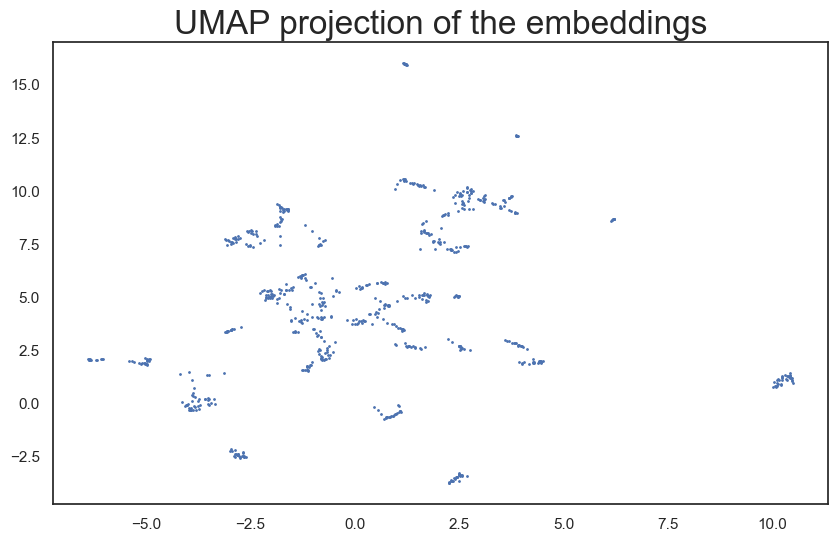

In [96]:
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    s=1
)
plt.title('UMAP projection of the embeddings', fontsize=24);

## Clustering

In [29]:
from sklearn.cluster import KMeans

El objetivo de k-means es reducir o minimizar la suma de las distancias entre el centroide del cluster y los puntos en él. 

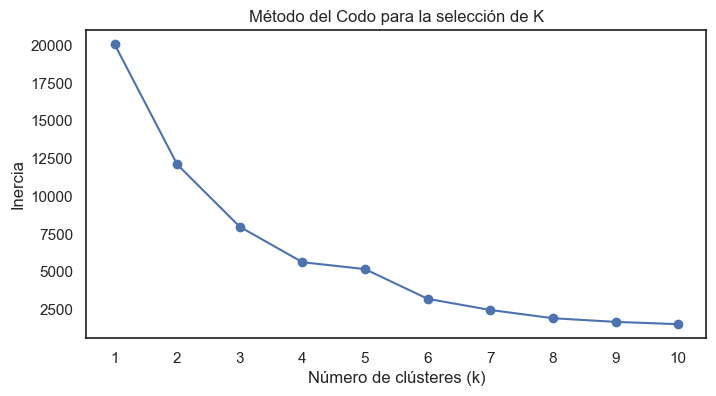

In [93]:
import matplotlib.pyplot as plt

# Lista para almacenar las inercias para diferentes valores de k
inertia = []

# Rango de valores de k a probar
k_values = range(1, 11)  # Puedes ajustar este rango según tus necesidades

# Entrenar el modelo KMeans para cada valor de k y almacenar la inercia
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0).fit(embedding)
    inertia.append(kmeans.inertia_)

# Graficar la curva del codo
plt.figure(figsize=(8, 4))
plt.plot(k_values, inertia, marker='o')
plt.title('Método del Codo para la selección de K')
plt.xlabel('Número de clústeres (k)')
plt.ylabel('Inercia')
plt.xticks(k_values)
plt.show()

In [102]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

In [103]:
kmeans = KMeans(n_clusters=7, random_state=0).fit(embedding)


In [104]:
type(kmeans)

sklearn.cluster._kmeans.KMeans

In [105]:
print(kmeans.cluster_centers_)  # Imprime las coordenadas de los centroides
print(kmeans.labels_)  # Imprime las etiquetas de clúster para cada punto de datos
print(kmeans.inertia_)  # Imprime la inercia del modelo
print(kmeans.n_iter_)  # Imprime el número de iteraciones

[[-2.0586686   8.156714  ]
 [ 1.6388106  -2.0059066 ]
 [-0.94900554  4.110058  ]
 [ 2.5967708   9.741884  ]
 [10.273715    1.0578115 ]
 [-4.0621047   0.03257465]
 [ 2.501745    3.30571   ]]
[0 2 2 2 3 3 5 1 5 5 2 2 1 1 2 6 2 2 3 3 2 0 3 4 3 3 3 3 3 5 5 1 2 2 2 6 6
 6 6 6 2 2 3 3 2 0 0 4 3 3 3 3 3 5 5 1 2 2 2 6 6 6 6 6 2 2 3 3 2 0 0 4 3 3
 3 3 3 5 5 1 2 2 2 2 6 6 6 6 2 2 3 3 5 0 0 4 3 3 3 3 3 5 5 1 2 2 6 2 6 6 6
 6 2 2 3 5 0 0 3 3 3 3 3 5 5 1 2 2 6 2 6 6 6 6 2 2 3 3 5 0 0 4 3 3 3 3 3 5
 5 1 2 2 6 2 6 6 6 6 2 2 3 3 5 0 0 4 3 3 3 3 3 2 5 1 2 6 6 2 6 6 6 6 2 2 3
 3 5 0 0 4 3 3 3 3 3 2 5 1 2 2 6 0 6 6 6 6 2 2 3 3 5 0 0 4 3 3 3 3 3 2 5 1
 2 2 6 2 6 6 6 6 2 2 3 3 5 0 0 3 3 3 3 3 5 5 1 2 2 6 2 6 6 6 6 2 2 3 3 5 0
 0 4 3 3 5 5 1 2 2 6 2 6 6 6 6 2 2 3 3 5 0 0 4 3 3 5 5 2 2 6 6 6 6 6 6 2 3
 3 5 0 0 4 2 3 5 5 1 2 2 6 6 6 6 6 2 2 4 2 3 0 0 5 3 2 5 2 5 3 3 1 2 6 6 2
 4 2 3 0 0 5 3 2 5 2 5 3 3 1 2 6 6 2 4 2 3 0 0 5 3 2 5 2 5 3 3 1 2 6 6 2 4
 2 3 0 0 5 3 2 5 2 5 3 3 1 2 6 2 4 2 3 0 0 5 3 2 5 2 5 3 3 1

## Visualización 2D

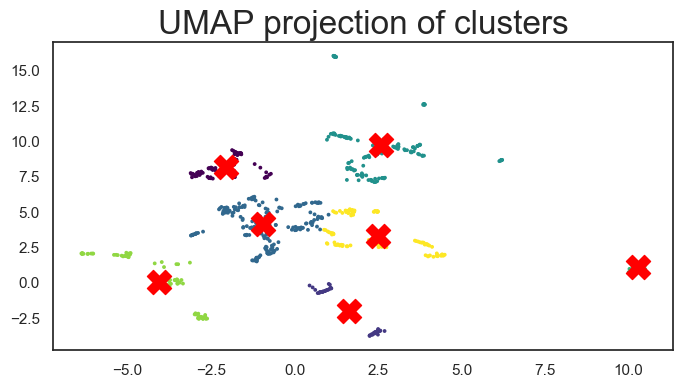

In [106]:
plt.figure(figsize=(8, 4)) 
plt.scatter(embedding[:, 0], embedding[:, 1], s=3, c=kmeans.labels_, cmap='viridis') 
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,  
 1], s=300, c='red', marker='X')  
plt.title('UMAP projection of clusters', fontsize=24);

plt.show()

## Métricas de evaluación
* Coeficiente de silueta: Mide qué tan similar es un punto a su propio clúster en comparación con otros clústeres. Un valor alto indica una buena agrupación.
* Índice de Davies-Bouldin: Mide la relación entre la dispersión dentro de los clústeres y la separación entre ellos. Un valor bajo indica una buena agrupación.


In [107]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

print(silhouette_score(embedding, kmeans.labels_))
print(davies_bouldin_score(embedding, kmeans.labels_))

0.5045601
0.613258185701426
